# Computational Social Science Project #3 

**Enter your Name:** Aldazia Green

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [3]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [4]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [5]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

Inspection_ID Inspection_Date                      DBA_Name  \
0         269961      2013-01-31                    SEVEN STAR   
1         507211      2011-10-18                  PANERA BREAD   
2         507212      2011-10-18      LITTLE QUIAPO RESTAURANT   
3         507216      2011-10-19  SERGIO'S TAQUERIA PIZZA INC.   
4         507219      2011-10-20         TARGET STORE # T-2079   

                   AKA_Name  License  Facility_Type             Risk  \
0                SEVEN STAR    30790  Grocery Store     Risk 3 (Low)   
1              PANERA BREAD  1475890     Restaurant    Risk 1 (High)   
2  LITTLE QUIAPO RESTAURANT  1740130     Restaurant    Risk 1 (High)   
3   SERGIO'S TAQUERIA PIZZA  1447363     Restaurant    Risk 1 (High)   
4                    TARGET  1679459     Restaurant  Risk 2 (Medium)   

                 Address     City State      Zip Inspection_Type Results  \
0       3352 N BROADWAY   CHICAGO    IL  60657.0         Canvass    Pass   
1    6059 N LINCOLN AVE   CHICAGO    IL  60659.0         Canvass    Pass   
2   6259 N MCCORMICK RD   CHICAGO    IL  60659.0         Canvass    Fail   
3  3253 W BRYN MAWR AVE   CHICAGO    IL  60659.0         Canvass    Pass   
4   2112 W PETERSON AVE   CHICAGO    IL  60659.0         Canvass    Fail   

    Latitude  Longitude                                  Location  \
0  41.943359 -87.644999  (41.943359344775146, -87.64499875300952)   
1  41.991919 -87.709631   (41.99191947239194, -87.70963133440333)   
2  41.995632 -87.712707   (41.99563177556418, -87.71270678169132)   
3  41.982933 -87.710982  (41.982933189164974, -87.71098225381141)   
4  41.990729 -87.682979   (41.99072921796059, -87.68297945359863)   

  Facility_Type_Clean  criticalCount  seriousCount  minorCount  pass_flag  \
0               Other              0             0           2          1   
1          Restaurant              0             0           3          1   
2          Restaurant              0             2           6          0   
3          Restaurant              0             0           6          1   
4          Restaurant              0             2           6          0   

   fail_flag  pastFail  pastCritical  pastSerious  pastMinor  timeSinceLast  \
0          0         0             0            0          0            2.0   
1          0         0             0            0          0            2.0   
2          1         0             0            0          0            2.0   
3          0         0             0            0          0            2.0   
4          1         0             0            0          0            2.0   

   firstRecord                ID  LICENSE_ID  ACCOUNT_NUMBER  \
0            1    30790-20110416   2081412.0         63759.0   
1            1  1475890-20110416   2081695.0        207283.0   
2            1  1740130-20110216   2070145.0          3107.0   
3            1  1447363-20110216   2071895.0        270993.0   
4            1  1679459-20100216   2009972.0         15538.0   

                     LEGAL_NAME        DOING_BUSINESS_AS_NAME  \
0            VIRGINIA DELA ROSA                    SEVEN STAR   
1                   PANERA, LLC                  PANERA BREAD   
2                ENELITA GARCIA      LITTLE QUIAPO RESTAURANT   
3  SERGIO'S TAZUERIA PIZZA INC.  SERGIO'S TAQUERIA PIZZA INC.   
4            TARGET CORPORATION         TARGET STORE # T-2079   

                 ADDRESS     CITY STATE  ZIP_CODE  WARD  PRECINCT  \
0    3352 N BROADWAY   1  CHICAGO    IL   60657.0  44.0      33.0   
1  6059 N LINCOLN AVE  C  CHICAGO    IL   60659.0  50.0      23.0   
2    6259 N MCCORMICK RD  CHICAGO    IL   60659.0  50.0      25.0   
3   3253 W BRYN MAWR AVE  CHICAGO    IL   60659.0  39.0      48.0   
4    2112 W PETERSON AVE  CHICAGO    IL   60659.0  40.0      18.0   

  WARD_PRECINCT  POLICE_DISTRICT  LICENSE_CODE        LICENSE_DESCRIPTION  \
0         44-33             19.0        1006.0  Retail Food Establishment   
1         50-23   

In [6]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [7]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [8]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

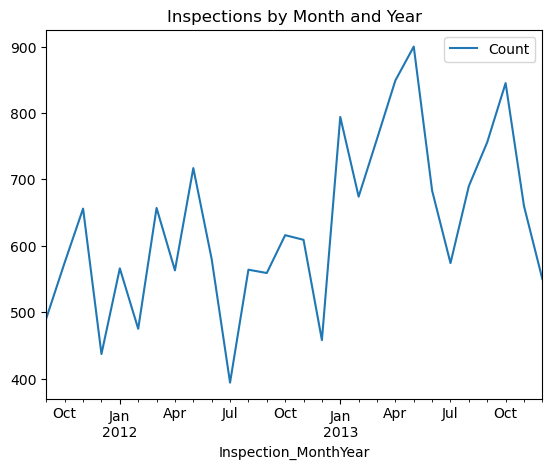

In [11]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

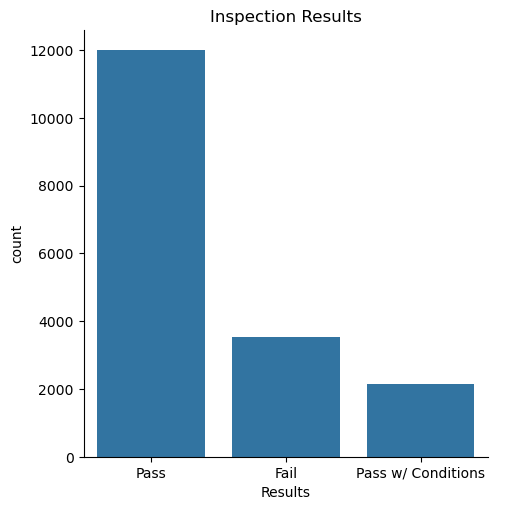

In [13]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

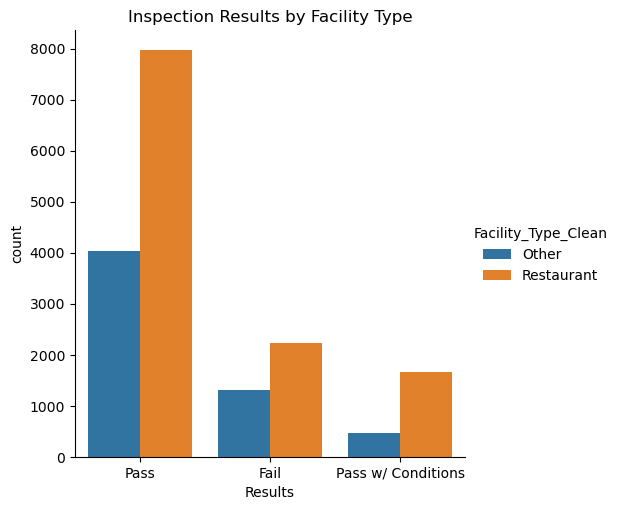

In [15]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [17]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [18]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [19]:
# view feature datset
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1 Logistic Regression

In [23]:
# load libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# settings
%matplotlib inline
sns.set_style("darkgrid")

In [24]:
# Set seed
np.random.seed(10)

# training and validation split 
X, X_validate, y, y_validate = train_test_split(X, 
                                                y, 
                                            train_size = .80, 
                                             test_size = .20, 
                                            stratify = y)

In [25]:
# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X, y.ravel())

# predict on the validation data
y_pred = logit_model.predict(X_validate)

In [26]:
# hyperparameter tuning
# ----------

# import libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# set parameters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)
logit_grid.fit(X, 
               y)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results. The results indicate that the Logistic regression
# has an approx. 0.92850
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.9285014691478942


In [27]:
# fit the model
logit_model = logit_reg.fit(X, y)

# prediction to validation data
y_pred = logit_model.predict(X_validate)


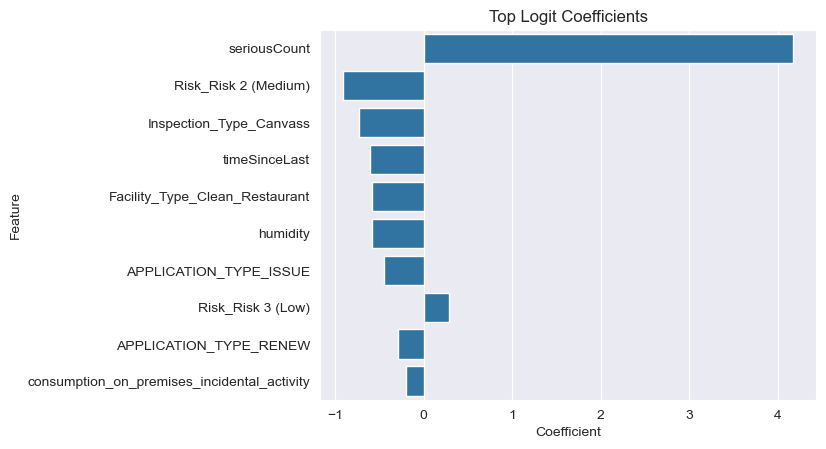

In [28]:
# extract the coefficents and create a dataframe for plotting 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])
# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()
#
#SeriousCount is the most important feature to predict passing or failing an inspection.
#This can possibly mean that having previous warnings/violations can make a restaurant 
#more likely to fail and another feature that can be considered important is having a medium risk type.


###  Model 2

In [30]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

# settings
%matplotlib inline
#sns.set_style("darkgrid")

In [31]:
# initialize a random forest classifier
# ----------
rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=100,             
                       criterion='gini',             
                       max_depth=None,                
                       min_samples_split=2,           
                       min_samples_leaf=1,            
                       min_weight_fraction_leaf=0.0,  
    max_features=None,           
                       max_leaf_nodes=None,          
                       min_impurity_decrease=1e-07,   
                       random_state = 10)             

In [32]:
# specify cross-validation
# ----------
scores_rf = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(),
                         cv=5)

In [33]:
# calculate the average score across models
# ----------
scores_rf.mean()

0.922925275622703

In [34]:
rf_classifier.fit(X, y) 
# predict on the validation data
y_pred = rf_classifier.predict(X_validate)

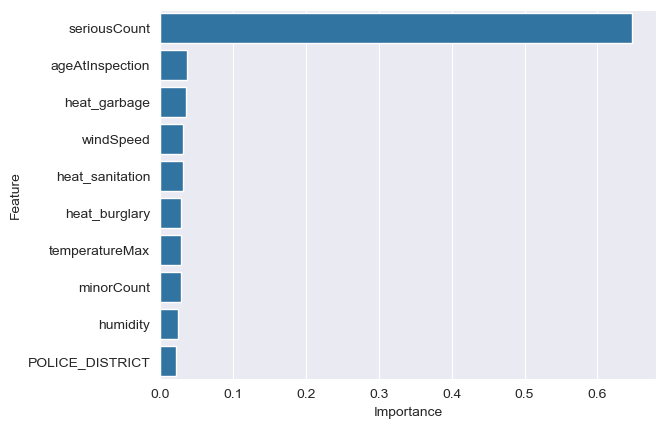

In [35]:
# fit the random forest on data to get feature importance
# ----------
rf_classifier.fit(X, y.ravel())

# import library
import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()
#SeriousCount is the most important feature to predict passing or failing an inspection. 
#All other features appear to be of equal importance in the random forest 

### Model 3 Voting Classifer 

In [37]:
# Logistic Regression - using liblinear solver
# ----------
log_reg = LogisticRegression(random_state = 10, 
                             solver='liblinear')

# Random Forest
# ----------
rf_classifier = RandomForestClassifier(
                       criterion='gini',              # you can also use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

# specify voting classifiers
# ----------
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [('lr', log_reg),
                                     ('rf', rf_classifier)],
                        # specify voting
                        voting = 'hard')


# loop through each model to report accuracy
# ----------
for clf, label in zip([log_reg, 
                       rf_classifier, 
                       voting_classifier], ['Logistic Regression', 
                                            'Random Forest', 
                                            'Ensemble']):
         scores = cross_val_score(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring='accuracy', 
                                  cv=5)
         print('Accuracy: %0.2f [%s]' % (scores.mean(), label))

Accuracy: 0.92 [Logistic Regression]
Accuracy: 0.92 [Random Forest]
Accuracy: 0.92 [Ensemble]


In [38]:
# specify a "soft" voting classifer in this iteration
# ----------
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [('lr', log_reg),
                                     ('rf', rf_classifier)],
                        # specify voting 
                        voting = 'soft')

# fit each classifer "c" to the data, predict the probability of tha clasifer and store as "probas"
probas = [c.fit(X, y.ravel()).predict_proba(X)[:,1] for c in (log_reg, 
                                                              rf_classifier,
                                                              voting_classifier)]

In [39]:
# create a dataset from the predicted probabilities
# ----------
probs_df = pd.DataFrame.from_records(probas).T # pulls the list of "probas" and stores as dataframe
probs_df.rename(columns = {0: 'logit',
                           1: 'rf',
                           2: 'ensemble'}, 
                inplace = True)

# view the first few observations
# ----------
probs_df.head(10)

logit    rf  ensemble
0  0.026573  0.69  0.358287
1  0.021677  0.00  0.010838
2  0.013397  0.00  0.006699
3  0.006868  0.00  0.003434
4  0.061611  0.00  0.030806
5  0.649314  0.76  0.704657
6  0.024947  0.00  0.012474
7  0.008515  0.00  0.004258
8  0.580253  0.89  0.735127
9  0.022991  0.00  0.011495

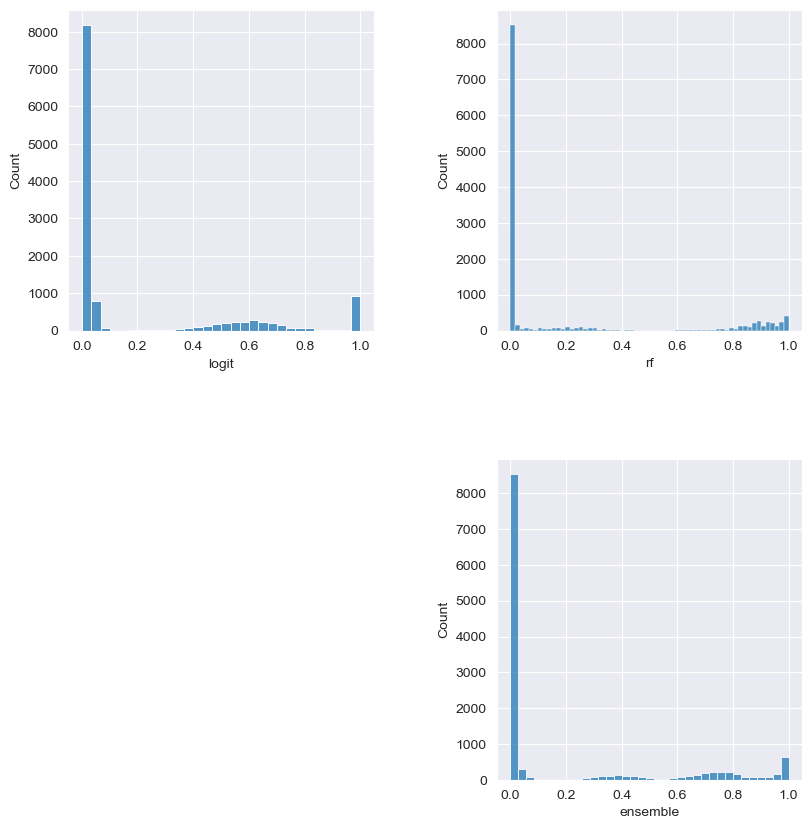

In [40]:
# visualize distributions
# ----------
# set figure parameters
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# logit
ax = fig.add_subplot(2, 3, 1)
sns.histplot(probs_df, x="logit", ax=ax)

# random forest
ax = fig.add_subplot(2, 3, 2)
sns.histplot(probs_df, x="rf", ax=ax)

# ensemble
ax = fig.add_subplot(2, 3, 5)
sns.histplot(probs_df, x="ensemble", ax=ax)

# show plot 
plt.show()
## All charts show all models are somewhat bimodal and skew to the left (towards 0, which is coded for Pass). Since this dataset had a few 
#individuals  who failed (i.e 1) the count of data points on the far right of the graphs is less than 1000


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [43]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier


In [44]:
#Logistic Regression
# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the trained estimators
cv_results_log = cross_validate(log_reg,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results_log[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")
# Find below the accuracy, recall, precision, F1 scores of the logistic regression model 

accuracy: 0.923
recall: 0.854
precision: 0.783
f1: 0.817


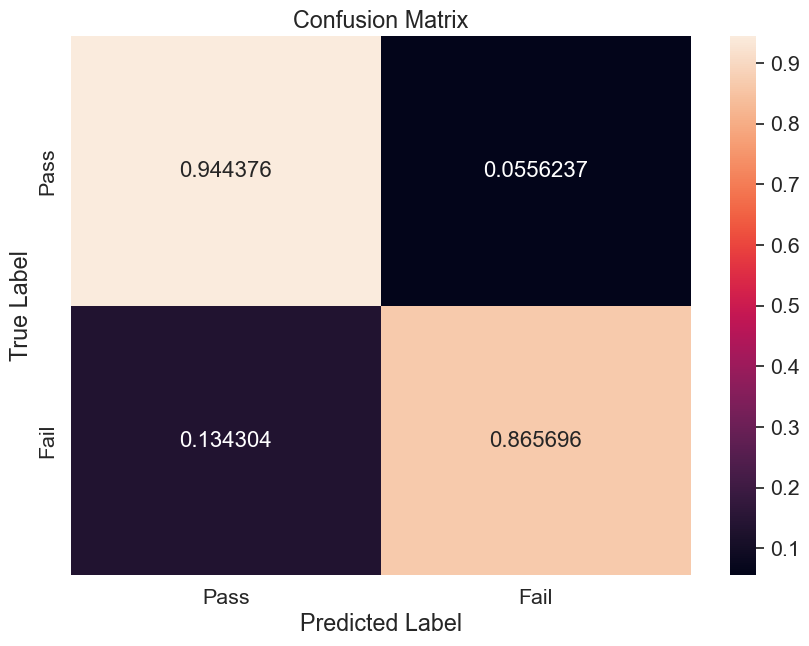

In [45]:
# specify confusion matrix
logcf_matrix = confusion_matrix(y_validate, 
                             best_logit_pred, 
                             normalize = "true")

# convert to dataframe
logdf_cm = pd.DataFrame(logcf_matrix, 
                     index= ["Pass", "Fail"], 
                    columns= ["Pass","Fail"])
# plot
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(logdf_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [46]:
#Randomforest
#perform cross-validation with 5-fold and return the trained estimators
cv_results_rf = cross_validate(rf_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results_rf[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")
    # Find below the accuracy, recall, precision, F1 scores of the  random forest model 
    

accuracy: 0.923
recall: 0.878
precision: 0.771
f1: 0.821


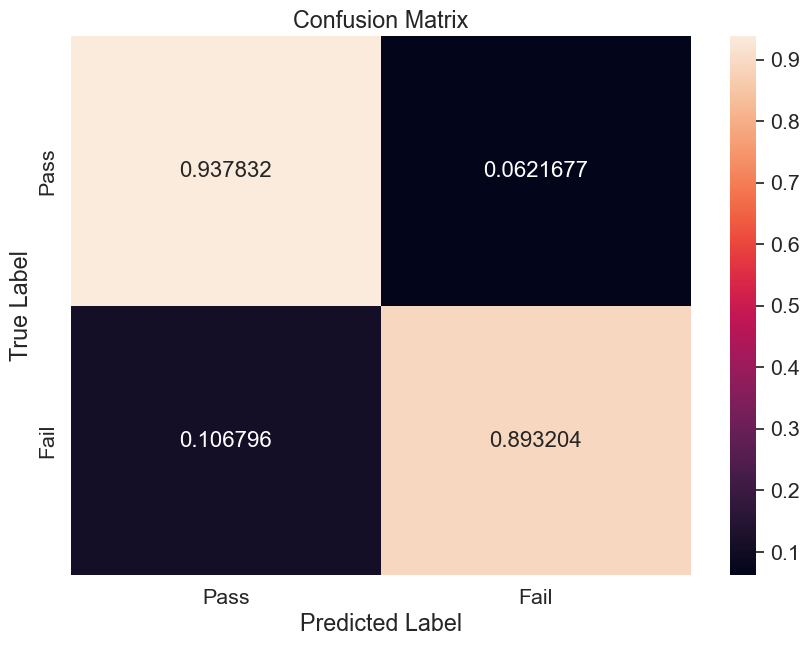

In [47]:
# specify confusion matrix
rfcf_matrix = confusion_matrix(y_validate, 
                             y_pred, 
                             normalize = "true")

# convert to dataframe
rfdf_cm = pd.DataFrame(rfcf_matrix, 
                     index= ["Pass", "Fail"], 
                    columns= ["Pass","Fail"])
# plot
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(rfdf_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Find in the confusion matrix below the false positive rates in the random forest is less than those in the logitstic regresison 

In [48]:
#Voting Classifer 
#perform cross-validation with 5-fold and return the trained estimators
cv_results_voting = cross_validate(voting_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results_voting[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")
# Find below the accuracy, recall, precision, F1 scores of the voting classifer model 

accuracy: 0.924
recall: 0.878
precision: 0.777
f1: 0.824



## Pros and Cons of each model 

Logistic Regression 
Pros: High accuracy rate, interpretable when applied to the social context
Cons: low F1 score, therefore the tradeoff between precision and recall in this model should be considered

Random forest 
Pros: High accuracy and high f1 score. Confusion matrix also supports a lower false positive rate of 0.106 which is lower than the confusion matric produced using the logistic regression model. 
Cons:  Feature importance plot shows that the serious counts is the only predictor that plays a role to predict the pass/fail outcome. However as the logistic regression shows, the medium risk class can also impact outcomes of the model perhaps in a more subtle way. 

Voting Classifer 
Pro:  As a blend of both of these supervised learning models, this ensemble had the highest f1 score compared to both random forest and logistic regression alone. 
Cons: Sometimes ensembles can be less interpretable as it is informed by multiple models to predict an outcome. When applied in a societal context, it make not be easily translated to consumers and policymakers on how the decision was arrived at. 





## 4. Policy Simulation
### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

## Response 
To see feature importance plots review section 3. As discussed prior serious counts remained to be an important feature across all 3 models. I also wish the restaurants debt information or marginal profit information to examine if this plays a role in their food safety outcomes 

**Hint**: Use tools like feature importance plots and coefficient plots.

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [52]:
# Set seed
np.random.seed(10)

# training and validation split 
X, X_validate, y, y_validate = train_test_split(X, 
                                                y, 
                                            train_size = .80, 
                                             test_size = .20, 
                                            stratify = y)

In [53]:
# create a model
rforest_reg = RandomForestClassifier(
                       criterion='gini',              # you can also use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed


# fit the model
randomforest_model = rforest_reg.fit(X, y.ravel())

# predict on the validation data
rf_y_pred = randomforest_model.predict(X_validate)



In [54]:
y_probas = rforest_reg.predict_proba(X_validate)[:,1]

In [55]:
y_probas
#this shows an array of a few of the predicted outcomes using this random forest model on the 2011- 2013 data 

array([0.  , 0.  , 0.63, ..., 0.92, 0.92, 0.  ])

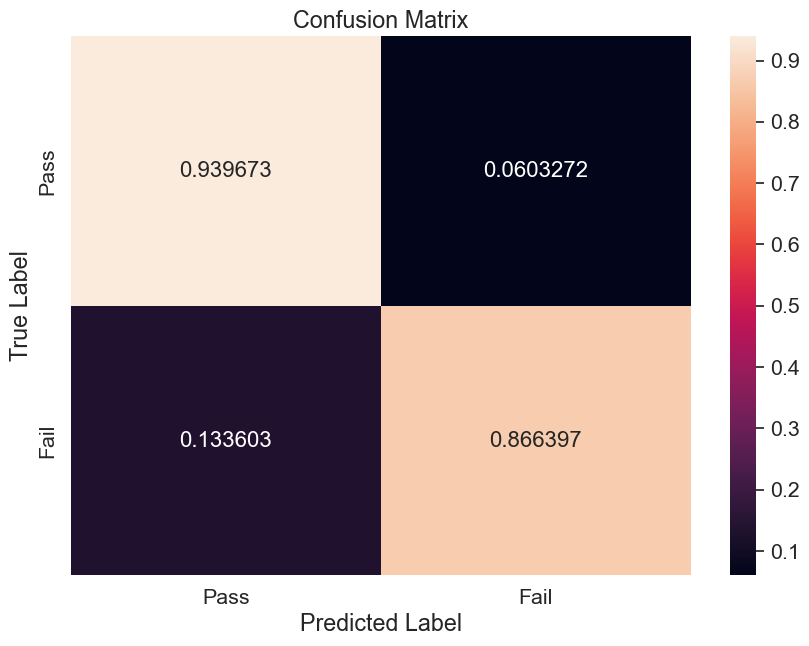

In [56]:
rf_model_cfmatrix = confusion_matrix(y_validate, 
                           rf_y_pred, 
                             normalize = "true")

# convert to dataframe
rf_cm = pd.DataFrame(rf_model_cfmatrix, 
                     index= ["Pass", "Fail"], 
                    columns= ["Pass","Fail"])
# plot
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(rf_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Find in the confusion matrix below the false positive rates in the random forest is less than those in the logitstic regresison 

In [57]:
# 2. Order your audits by their probability of detecting a "Fail" score
audit_failed_results = pd.DataFrame({'Failed probs': y_probas })
sorted_rf = audit_failed_results.sort_values(by='Failed probs',ascending=False)

In [58]:
sorted_rf
#shows the predicted probabilities of detecting a fail score in descending order from 1 representing fail and 0 representing pass 

Failed probs
1664           1.0
321            1.0
1666           1.0
1943           1.0
619            1.0
...            ...
960            0.0
955            0.0
954            0.0
952            0.0
2449           0.0

[2450 rows x 1 columns]

In [59]:
audit_failed_results.head(100)
# here you see the predicted probabilities for 2011-2013 data representing specifically the failed results in a non-ordered way. 
#But it helps illustrate that not all probabilities in this random forest model shows a exact prediction of 100% or 0%

Failed probs
0           0.00
1           0.00
2           0.63
3           0.84
4           0.00
..           ...
95          0.77
96          0.80
97          0.00
98          0.43
99          0.00

[100 rows x 1 columns]

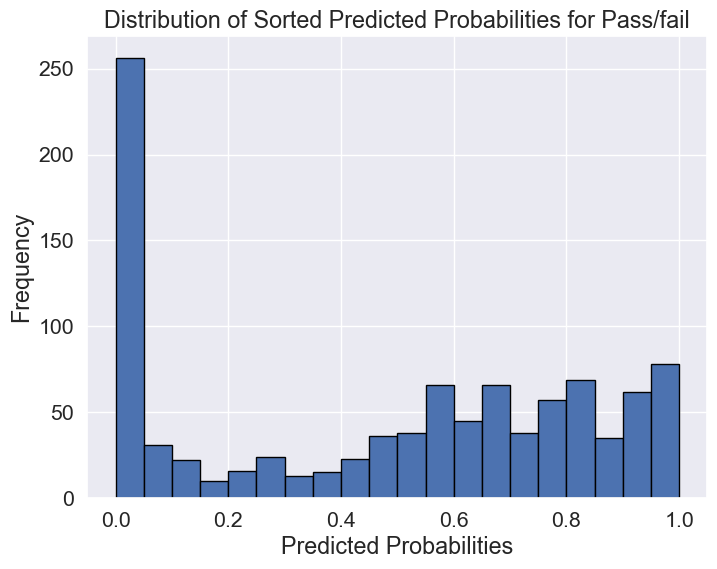

In [60]:
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
np.random.seed(1000)

top_1000_obs = sorted_rf.head(1000)  # Probabilities for Pass or fail

# Plotting the distribution of sorted predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(top_1000_obs , bins=20, edgecolor='black')
plt.title('Distribution of Sorted Predicted Probabilities for Pass/fail')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#As shown here, the 2011 to 2013 shows a higher frequency count in the 1000 observations to have idetified as pass or fail. 
#However, this histogram below provides a more detailed description of predicted probabilities of those 
#that were likely to be predicted to fail.

In [61]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------
np.random.seed(1000)

Total_obs = chicago_inspections_2011_to_2013.shape[0]  

subsetted_dataset= chicago_inspections_2011_to_2013.sample(n=1000,replace=False)



In [62]:
subsetted_dataset.shape

(1000, 39)

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [64]:
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)
chicago_inspections_2014.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'ID', 'LICENSE_ID', 'ACCOUNT_NUMBER', 'LEGAL_NAME',
       'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP_CODE',
       'WARD', 'PRECINCT', 'WARD_PRECINCT', 'POLICE_DISTRICT', 'LICENSE_CODE',
       'LICENSE_DESCRIPTION', 'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY',
       'LICENSE_NUMBER', 'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement

In [65]:
# data processing
# -----------
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',],
                                     inplace = True)

In [66]:
# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [67]:
# convert the inspection date to a datetime format
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'])  

In [68]:
 chicago_inspections_2014= chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                         ],
                                                                                  axis = 1)

In [69]:
# process target 
# -----------
y_test2014 = chicago_inspections_2014['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014)

# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X_test2014=  chicago_inspections_2014.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X_test2014 = pd.get_dummies(X_test2014)

In [70]:
X_test2014.shape

(3937, 41)

In [71]:
y_test2014.shape
#it is important that the shape of both Y and X values are the same ( i.e 3937). This will aid the evaultion process. 

(3937, 1)

In [72]:
# predict and compare 
# -----------

rforest_year2014 = RandomForestClassifier(
                       criterion='gini',              # you can also use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed


# fit the model
randomforest2014_model = rforest_year2014.fit(X_test2014, y_test2014.ravel())

# predict on the X_test2014 data
rf_year14_pred = randomforest2014_model.predict(X_test2014)


In [73]:
# evaluate
# -----------
#perform cross-validation with 5-fold and return the trained estimators
cv_results_rf_14 = cross_validate(rforest_year2014,        # specify estimator 
                            X_test2014,                     # specify features
                            y_test2014.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results_rf_14[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")
#     Find below the accuracy, recall, precision, F1 scores of the  random forest model, please note the comparison between 
#    these numeric output values vs those gathered when training the model on  the 2011-2013 data. Earlier in the notebook we found that 
#     the random forest model produced the following metrics for the 2011-2013 data was accuracy: 0.924 recall: 0.878 precision: 0.777 
#     f1: 0.824. When comparing each statistic, it appears that the random forest had less accruacy, precision, and recall when
#      predicting the 2014 data. 

    

accuracy: 0.896
recall: 0.785
precision: 0.722
f1: 0.751


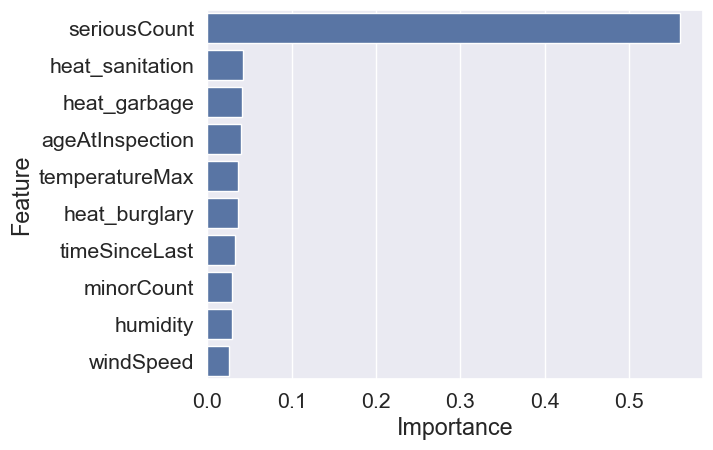

In [74]:

# import library
import seaborn as sns
# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rforest_year2014.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()
#SeriousCount is the most important feature to predict passing or failing an inspection even within this 2014 data . 

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**YOUR ANSWER HERE**
We need metrics beyond accuracy to evaulate aspects of a machine learning model pertaining to prediction, discrimination, and calibration. Elements such as precision, recall, and F1 scores shed light on the false positive rates and true positives rates of a algorithmic model. When utilized in the real world, a low precision number indicate that the model has higher false positive rates. In the context of the Chicago 2011-2013 data , we can see the changes in precision, recall, and F1 scores depending on the statisical model we choose. Feature and model seletcion impacts the model's overall performance and scholars should continue to be open to  other fairness metrics. Further, this notebook illusrates not all models can easily be translated to different datasets. When the random forest model was fitted to the Chicago 2014 data, the model did not have the same accuracy, precision, recall, F1 scores as the previous 2011-2013 data. Data scientist and Policy-makers should consider the implications when adopting algorithms across different sectors and populations.  

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE**

At the intersection between algorithmic decision making and human behavior, policy-makers can address issues that arise by implementing both structural and technical fixes. Technical fixes includes frequently changing model and important feature selections as it relates to the pass/fail outcome. In future research, we can also see the impact of weighted probabilites when applied to Chicago food inspection data. It is important that the Department of Health to maintain transparency if the algorithm is to be used to inform important decision-making processes therefore these changes should be reported annually via an advisory board. I believe it can also be important for the policy-makers to provide incentives for passing food inspections. Restaurants can compete for these monetary rewards or formal certifications can be provided for those that have passed the inspection. 